** **

<figure>
<div style="text-align:center"><img src="./img/compton_scattering.png" /></div>
<h3><center>Scattering diagram showing the photon being scattered from an electron initially at rest.</center></h3>
</figure>

# Estimating the mass of the electron

** **

* This project uses the lmfit package. Lmfit provides curve fiting using non-linear least squares minimization and was developed by Matt Newville: https://github.com/newville.

## Install and import libraries

In [1]:
#uncomment the following lines to install lmfit

#from subprocess import call
# call(['pip', 'install', 'lmfit'])
# call(['pip', 'install', 'matplotlib'])
#call(['pip', 'install', 'ipympl'])

#install pymc3
#%pip install pymc3

In [2]:
#import libraries
from numpy import sqrt, pi, exp, linspace, loadtxt
import matplotlib.pyplot as plt
from lmfit.models import LinearModel, PolynomialModel
import numpy as np
import matplotlib
import pandas as pd

matplotlib.rcParams['legend.handlelength'] = 1
matplotlib.rcParams['legend.numpoints'] = 1

## Data

In [3]:
#impot the csv (generated from the previous steps) into a dataframe
df = pd.read_csv("./Data/Compton_data.csv", header = None)

#rename columns
df.columns = ["x", "y"]

#preview the data
df

,x,y
0,0.048943,1.753527
1,0.060307,1.746433
2,0.093692,1.774167
3,0.133975,1.857251
4,0.233956,2.225878
5,0.357212,2.511150
6,0.500000,2.827525
7,0.657980,3.179167
8,0.826352,3.571215
9,1.000000,3.889928


## Define the model, fit, and print the results

In [4]:
#use builtin model:
mod1 = LinearModel(prefix='p1_')

#initialize the parameters to be optimized
pars1 = mod1.guess(df["y"], x=df["x"])

In [5]:
#fit with weights=1./yerr
result1 = mod1.fit(df["y"], pars1, x=df["x"], weights = 1. / (df["y"] * 0.0261))

#print the Fit Statistics and parameters
print('------------------------------------------------------')
print(result1.fit_report())
print('------------------------------------------------------')

------------------------------------------------------
[[Model]]
    Model(linear, prefix='p1_')
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 13
    # variables        = 2
    chi-square         = 11.0038783
    reduced chi-square = 1.00035258
    Akaike info crit   = 1.83287959
    Bayesian info crit = 2.96277830
    R-squared          = 0.29390869
[[Variables]]
    p1_slope:      2.27157999 +/- 0.04863668 (2.14%) (init = 2.211904)
    p1_intercept:  1.62132431 +/- 0.02332938 (1.44%) (init = 1.655738)
[[Correlations]] (unreported correlations are < 0.100)
    C(p1_slope, p1_intercept) = -0.6429
------------------------------------------------------


## Plot the model

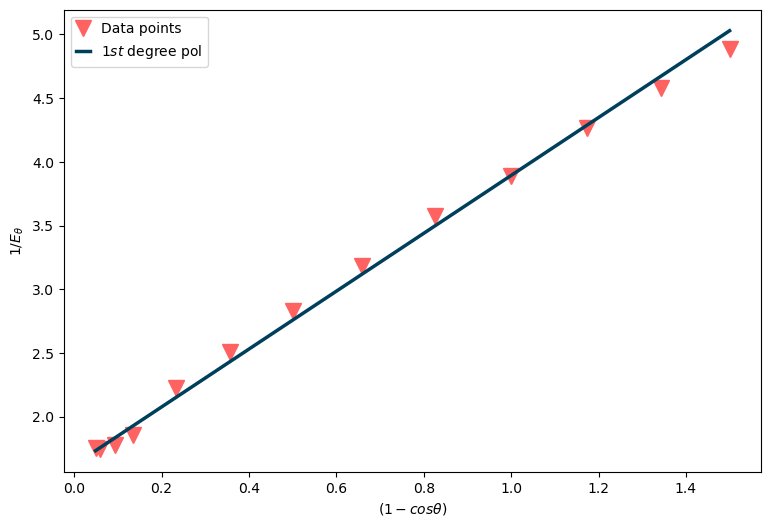

In [6]:
#set the figure size 
plt.figure(figsize=(9,6))

#plot data and model
plt.plot(df["x"], df["y"], "v", color='#ff6361', markersize=12)
plt.plot(df["x"], result1.best_fit, '#003f5c', linewidth=2.5)

#customize the labels
plt.ylabel(r'$1/E_{\theta}$')
plt.xlabel(r'$(1-cos{\theta}$)')
plt.legend(('Data points','$1st$ degree pol'),loc='best')

#show the graph
plt.show()

## Because the slope is equal to $ \frac{1}{m_e c^2}$ the mass of the electron will be given by:

# $m_e = \frac{1}{slope \cdot c^2}$

In [7]:
#Print the new position
varys = result1.params.valuesdict()

slope = varys["p1_slope"]

print(slope)

2.271579988552963


In [8]:
#The speed of light
c = 2.9979e8

In [9]:
#Calculate the mass of the electron in MeV/c^2

mass_MeV = 1 / slope

print()
print("The estimated mass of the electron is", f'{mass_MeV: .4}', "MeV/c^2")
print()


The estimated mass of the electron is  0.4402 MeV/c^2



** **

### The result above is in $\frac{MeV}{c^2}$ which is a convenient unit for computations in modern physics. To convert to SI the following unit analysis needs to be applied:

## $\frac{MeV}{c^2} \times 10^6\frac{eV}{MeV} \times 1.6022 \times 10^{-19} \frac{J}{eV} = \frac{Kg\frac{m^2}{s^2}}{c^2} = Kg$

** **

In [10]:
#Calculate the mass of the electron in Kg

mass_Kg = (1/slope) * 10**6 * 1.6022 * 10**-19 / c**2

print()
print("The estimated mass of the electron is", "{:.4e}".format(mass_Kg), "Kg")
print()


The estimated mass of the electron is 7.8479e-31 Kg



### The value above is the right order of magnitude but not quite the same as the accepted value of $9.1094 \times 10^-31 Kg$ or $0.5110 \frac{MeV}{c^2}$. Repeating the experiment a suficient number of times would produce a distribution of mass values with a mean expected to approach the standard value.    

** **

## Author

### <a href="https://www.linkedin.com/in/alin-airinei/">Alin Airinei</a>

** **